In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [15]:
ch_visited = []
ch_relaxed = []
ch_time = []
chase_visited = []
chase_relaxed = []
chase_time = []
skeleton_chase_visited = []
skeleton_chase_relaxed = []
skeleton_chase_time = []
length = []
edges = []

with open('logs/log_29-07-2022 15-33-30.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if int(row[0]) == 1:
            length.append(int(row[1]))
            ch_relaxed.append(int(row[4]))
            chase_relaxed.append(int(row[5]))
            skeleton_chase_relaxed.append(int(row[6]))
            ch_visited.append(int(row[7]))
            chase_visited.append(int(row[8]))
            skeleton_chase_visited.append(int(row[9]))
            ch_time.append(float(row[10]))
            chase_time.append(float(row[11]))
            skeleton_chase_time.append(float(row[12]))
            edges.append(int(row[13]))
print(len(length))

50000


In [16]:
v_ch = np.mean(ch_visited)
v_chase = np.mean(chase_visited)
v_skeleton_chase = np.mean(skeleton_chase_visited)
r_ch = np.mean(ch_relaxed)
r_chase = np.mean(chase_relaxed)
r_skeleton_chase = np.mean(skeleton_chase_relaxed)
t_ch = np.mean(ch_time)
t_chase = np.mean(chase_time)
t_skeleton_chase = np.mean(skeleton_chase_time)

50000 runs: avg path time (ms) = 7340571.48446, avg path edges: 13.2333
skeleton chase: 105.04776 edges visited, 23.81822 edges relaxed on avg. (-2.98%) (-2.43%)
         chase: 108.27786 edges visited, 24.41044 edges relaxed on avg. (-84.51%) (-87.31%)
            ch: 698.93796 edges visited, 192.32404 edge relaxed on avg.


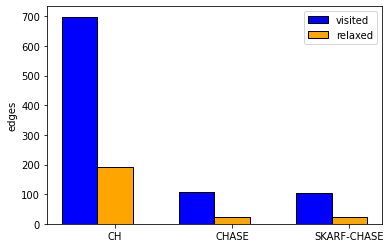

In [17]:
barWidth = 0.3

bars1 = [v_ch, v_chase, v_skeleton_chase]
bars2 = [r_ch, r_chase, r_skeleton_chase]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='visited')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='relaxed')

 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['CH', 'CHASE', "SKARF-CHASE"])
plt.ylabel('edges')
plt.legend()
 
# Show graphic
print(len(length), "runs:", "avg path time (ms) =", f'{np.mean(length)},', "avg path edges:", np.mean(edges))
print("skeleton chase:", v_skeleton_chase, "edges visited,", r_skeleton_chase, "edges relaxed on avg.", f'(-{round(100-(v_skeleton_chase/v_chase)*100, 2)}%)', f'(-{round(100-(r_skeleton_chase/r_chase)*100, 2)}%)')
print("         chase:", v_chase, "edges visited,", r_chase, "edges relaxed on avg.", f'(-{round(100-(v_chase/v_ch)*100, 2)}%)', f'(-{round(100-(r_chase/r_ch)*100, 2)}%)')
print("            ch:", v_ch, "edges visited,", r_ch, "edge relaxed on avg.")
plt.show()

50000 runs: avg path time (ms) = 7340571.48446


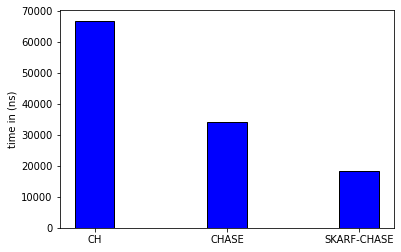

In [18]:
barWidth = 0.3

bars1 = [t_ch, t_chase, t_skeleton_chase]
 
# The x position of bars
r1 = np.arange(len(bars1))
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7)
 
plt.xticks([r for r in range(len(bars1))], ['CH', 'CHASE', 'SKARF-CHASE'])
plt.ylabel('time in (ns)')
 
# Show graphic
print(len(length), "runs:", "avg path time (ms) =", np.mean(length))
plt.show()